### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [15]:
data = pd.read_csv('data/coupons.csv')

In [18]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


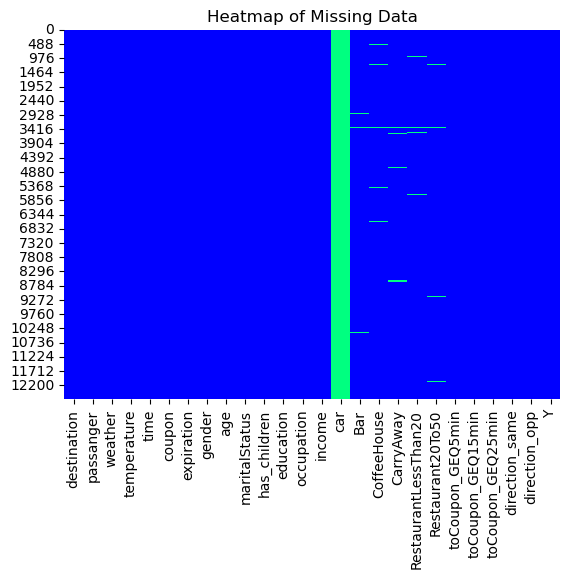

In [21]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

# Visualize missing data using a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='winter')
plt.title("Heatmap of Missing Data")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [24]:
# Drop rows with any missing values
data_cleaned = data.drop(columns=['car']).dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Print cleaned DataFrame
missing_data2 = data_cleaned .isnull().sum()
missing_data2 = missing_data2[missing_data2 > 0]
print(missing_data2)

Series([], dtype: int64)


4. What proportion of the total observations chose to accept the coupon?



Y
1    6877
0    5202
Name: count, dtype: int64


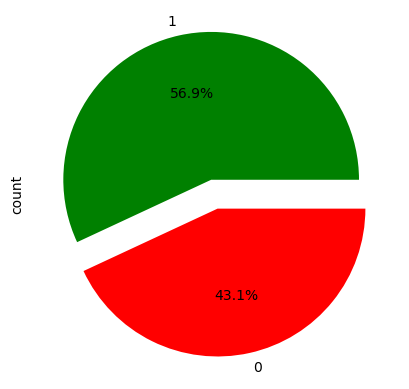

In [27]:

data_cleaned['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'])
print(data_cleaned['Y'].value_counts())


5. Use a bar plot to visualize the `coupon` column.

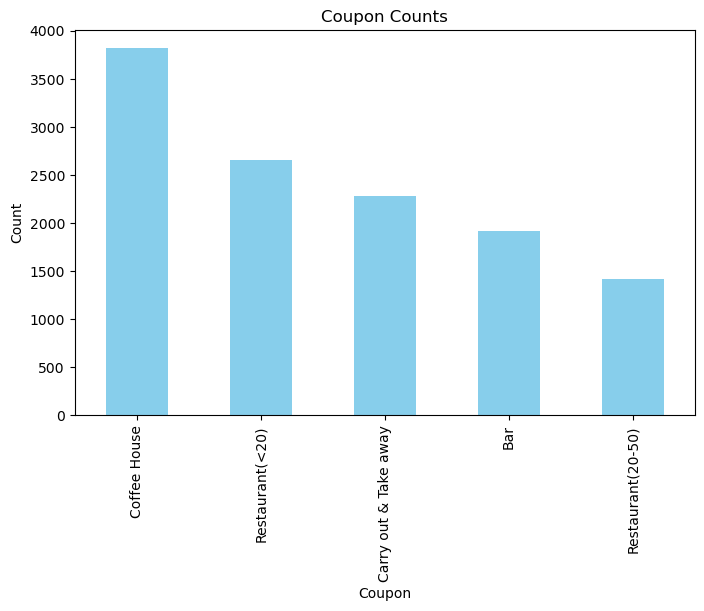

In [30]:
# Count occurrences of each coupon category
coupon_counts = data_cleaned['coupon'].value_counts()

# Plot the bar chart
coupon_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Add title and labels
plt.title('Coupon Counts')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

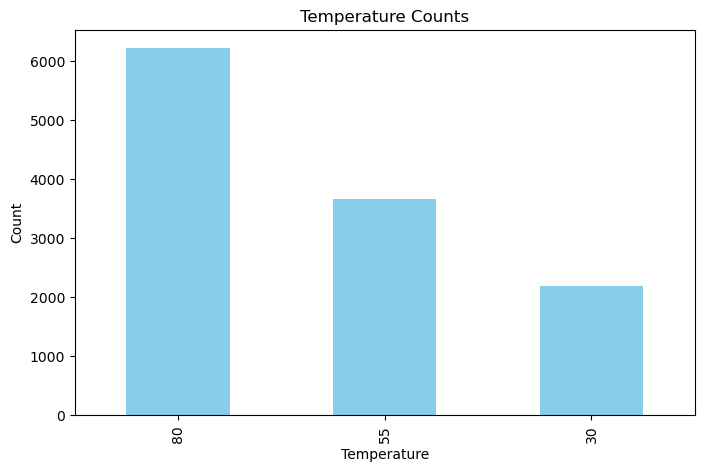

In [33]:
# Count occurrences of each temperature category
temperature_counts = data_cleaned['temperature'].value_counts()

# Plot the bar chart
temperature_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Add title and labels
plt.title('Temperature Counts')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
df_bar = data_cleaned[data_cleaned['coupon'] == 'Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


Proportion of bar coupons accepted: 41.19%


<Axes: ylabel='count'>

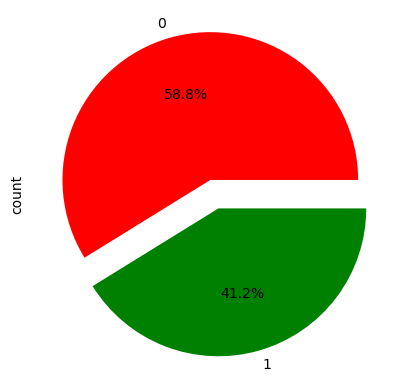

In [43]:
# Calculate the proportion of bar coupons accepted
bar_acceptance_rate = df_bar['Y'].mean() * 100
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}%")

df_bar['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['r','g'])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar Frequency Category
3 or fewer times     37.267442
More than 3 times    76.165803
Name: Y, dtype: float64


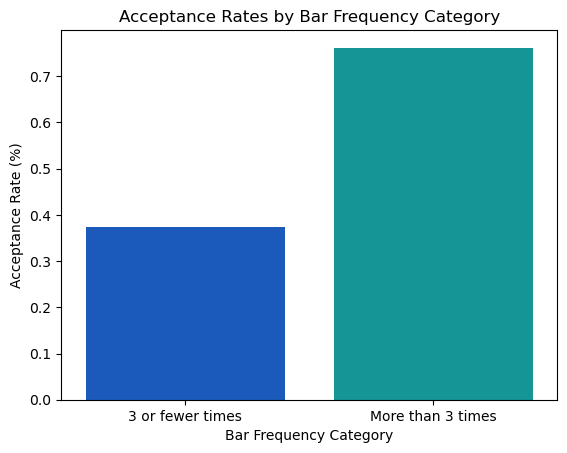

In [46]:
# Filter the data for bar-related coupons and create a copy
df_bar_copy = df_bar.copy()

# Define categories for bar frequency
df_bar_copy['Bar Frequency Category'] = df_bar_copy['Bar'].apply(
    lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'More than 3 times'
)

# Group by frequency category and calculate the acceptance rate
acceptance_by_frequency = df_bar_copy.groupby('Bar Frequency Category')['Y'].mean() * 100
print(acceptance_by_frequency)

# Plot acceptance rates by bar frequency
sns.barplot(
    data=df_bar_copy,
    x='Bar Frequency Category',
    y='Y',
    errorbar=None,
    hue='Bar Frequency Category',
    palette='winter'
)
plt.title('Acceptance Rates by Bar Frequency Category')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Bar Frequency Category')
plt.show()

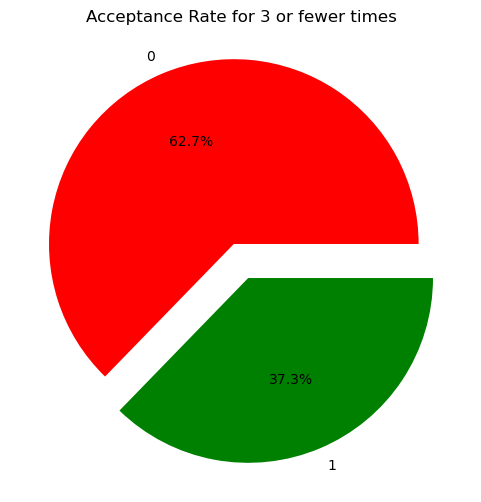

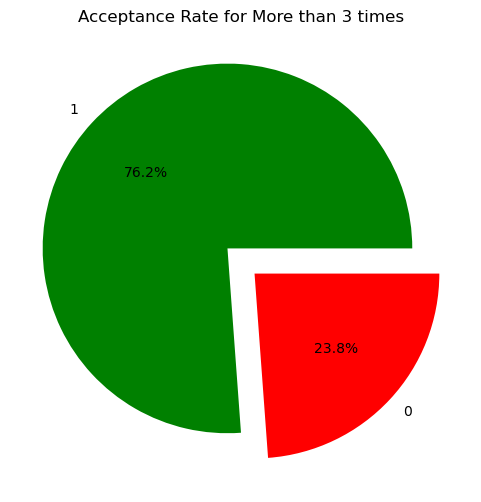

Bar Frequency Category
3 or fewer times     37.267442
More than 3 times    76.165803
Name: Y, dtype: float64


In [48]:
# Calculate the acceptance rate for each 'Bar Frequency Category'
acceptance_rate_by_category = df_bar_copy.groupby('Bar Frequency Category')['Y'].mean()

# Plot pie chart for each category (3 or fewer times and more than 3 times)
for category in acceptance_rate_by_category.index:
    category_data = df_bar_copy[df_bar_copy['Bar Frequency Category'] == category]
    acceptance_counts = category_data['Y'].value_counts()

    # Manually set the colors to ensure 'Y=1' is always green and 'Y=0' is red
    colors = ['r', 'g'] if acceptance_counts.index[0] == 0 else ['g', 'r']

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    acceptance_counts.plot(kind='pie', explode=[0.1] * len(acceptance_counts), autopct='%1.1f%%', colors=colors)
    plt.title(f'Acceptance Rate for {category}')
    plt.ylabel('')  # Remove the y-label
    plt.show()


# Display the overall value counts for 'Y'
print(acceptance_rate_by_category * 100)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.41%
Acceptance rate for all other drivers: 35.09%


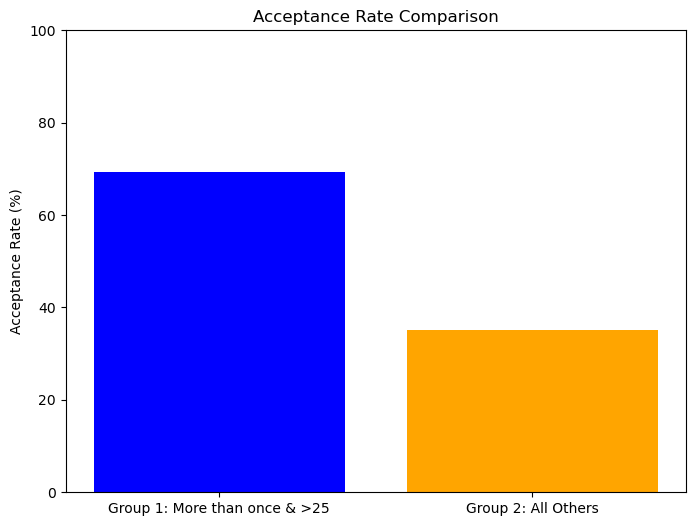

In [51]:

# Convert the 'age' column to numeric, forcing errors to NaN
df_bar_copy['age'] = pd.to_numeric(df_bar_copy['age'], errors='coerce')

# Group 1: Drivers who go to a bar more than once a month and are over 25
group1 = df_bar_copy[(df_bar_copy['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar_copy['age'] > 25)]

# Group 2: All other drivers
group2 = df_bar_copy[~((df_bar_copy['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar_copy['age'] > 25))]

# Calculate acceptance rates
group1_acceptance_rate = group1['Y'].mean() * 100
group2_acceptance_rate = group2['Y'].mean() * 100

# Display results
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {group1_acceptance_rate:.2f}%")
print(f"Acceptance rate for all other drivers: {group2_acceptance_rate:.2f}%")


# Prepare data for visualization
categories = ['Group 1: More than once & >25', 'Group 2: All Others']
acceptance_rates = [group1_acceptance_rate, group2_acceptance_rate]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['blue', 'orange'])
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate for Group 1 (no kids, non-farming occupations): 76.17%
Acceptance rate for Group 2 (all others): 37.27%


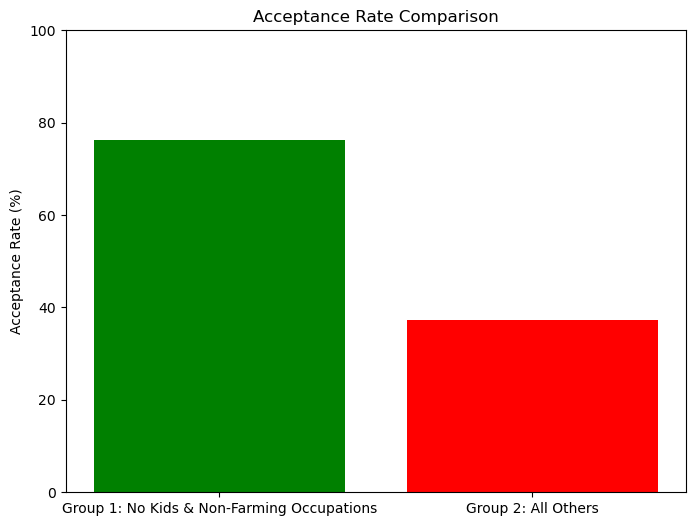

In [54]:

# Group 1: Drivers who go to bars more than once a month, no kid passengers, no farming/fishing/forestry occupations
df_bar_5_group1 = df_bar_copy[
    (df_bar_copy['Bar'].isin(['4~8', 'gt8'])) &
    (df_bar_copy['passanger'] != 'Kid') &
    (~df_bar_copy['occupation'].isin(['Farming Fishing & Forestry']))
]

# Group 2: All other drivers
df_bar_5_group2 = df_bar_copy[
    ~((df_bar_copy['Bar'].isin(['4~8', 'gt8'])) &
      (df_bar_copy['passanger'] != 'Kid') &
      (~df_bar_copy['occupation'].isin(['Farming Fishing & Forestry'])))
]

# Calculate acceptance rates
df_bar_5_group1_acceptance_rate = df_bar_5_group1['Y'].mean() * 100
df_bar_5_group2_acceptance_rate = df_bar_5_group2['Y'].mean() * 100

# Display results
print(f"Acceptance rate for Group 1 (no kids, non-farming occupations): {df_bar_5_group1_acceptance_rate:.2f}%")
print(f"Acceptance rate for Group 2 (all others): {df_bar_5_group2_acceptance_rate:.2f}%")

# visualization
categories = ['Group 1: No Kids & Non-Farming Occupations', 'Group 2: All Others']
acceptance_rates = [df_bar_5_group1_acceptance_rate, df_bar_5_group2_acceptance_rate]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['green', 'red'])
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate for Group 1 (satisfying any of the three conditions): 68.53%
Acceptance rate for Group 2 (all others): 29.53%


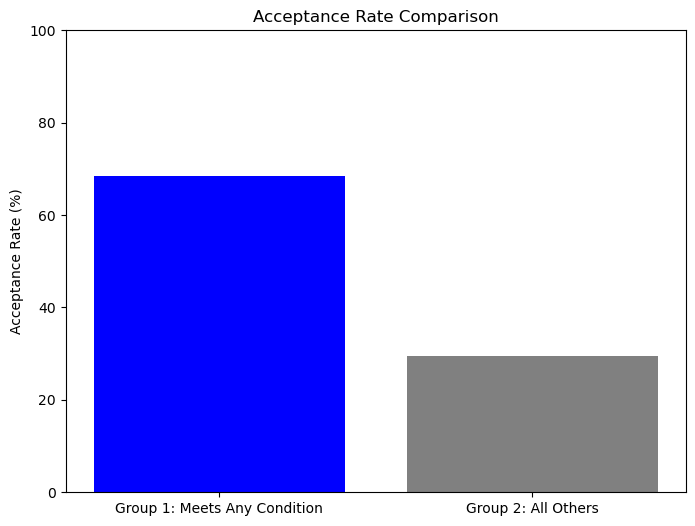

In [57]:
# Convert the 'age' column to numeric, forcing errors to NaN
df_bar_copy['income'] = pd.to_numeric(df_bar_copy['income'], errors='coerce')

# Filter the data for each condition
df_bar_6_condition1 = (
    (df_bar_copy['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (df_bar_copy['passanger'] != 'Kid') &
    (df_bar_copy['maritalStatus'] != 'Widowed')
)

df_bar_6_condition2 = (
    (df_bar_copy['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (df_bar_copy['age'] < 30)
)

df_bar_6_condition3 = (
    (df_bar_copy['RestaurantLessThan20'].isin(['1~3', '4~8', 'gt8'])) &
    (df_bar_copy['income'] < 50000)
)

# Combine the conditions using logical OR
df_bar_6_filtered_data = df_bar_copy[df_bar_6_condition1 | df_bar_6_condition2 | df_bar_6_condition3]

# Group 1: Drivers satisfying any of the three conditions
df_bar_6_group1_acceptance_rate = df_bar_6_filtered_data['Y'].mean() * 100

# Group 2: All other drivers
df_bar_6_group2 = df_bar_copy[~(df_bar_6_condition1 | df_bar_6_condition2 | df_bar_6_condition3)]
df_bar_6_group2_acceptance_rate = df_bar_6_group2['Y'].mean() * 100

# Display results
print(f"Acceptance rate for Group 1 (satisfying any of the three conditions): {df_bar_6_group1_acceptance_rate:.2f}%")
print(f"Acceptance rate for Group 2 (all others): {df_bar_6_group2_acceptance_rate:.2f}%")

# visualization
df_bar_6_categories = ['Group 1: Meets Any Condition', 'Group 2: All Others']
df_bar_6_acceptance_rates = [df_bar_6_group1_acceptance_rate, df_bar_6_group2_acceptance_rate]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_bar_6_categories, df_bar_6_acceptance_rates, color=['blue', 'gray'])
plt.title('Acceptance Rate Comparison')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accepted bar coupons were somewhat younger. These drivers were looking to save money, and have a good time with their friends or partners. Usually the drivers are from city or surrounding areas, and hence more likely to spend time at a bar. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new DataFrame that contains just the carryout_takeaway coupons.

In [77]:
#Filter the data for bar-related coupons and create a copy
df_CarryAway_orig = data_cleaned[data_cleaned['coupon'] == 'Carry out & Take away']
df_CarryAway = df_CarryAway_orig.copy()
# Convert the 'age' column to numeric, forcing errors to NaN
df_CarryAway['age'] = pd.to_numeric(df_CarryAway['age'], errors='coerce')
df_CarryAway['income'] = pd.to_numeric(df_CarryAway['income'], errors='coerce')
df_CarryAway.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21.0,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46.0,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46.0,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1


2. Calculate the proportion of carryout_takeaway coupons accepted

In [84]:
# Calculate the proportion of carry_out and take_away coupons accepted
carryout_takeaway_acceptance_rate = df_CarryAway['Y'].mean() * 100
print(f"Proportion of carryout_takeaway coupons accepted: {carryout_takeaway_acceptance_rate:.2f}%")



Proportion of carryout_takeaway coupons accepted: 73.77%


3. Compare the acceptance rate between those who _carryout_takeaway 3 or fewer times a month to those who went more.

CarryAway Frequency Category
3 or fewer times     72.356370
More than 3 times    75.347544
Name: Y, dtype: float64


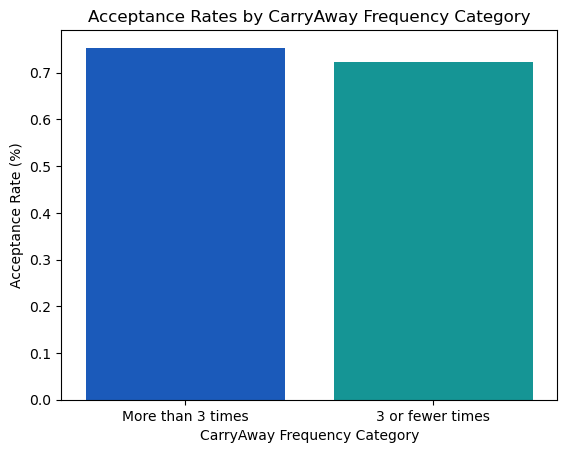

In [416]:
# Define categories for CarryAway frequency
df_CarryAway['CarryAway Frequency Category'] = df_CarryAway['CarryAway'].apply(
    lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'More than 3 times'
)

# Group by frequency category and calculate the acceptance rate
acceptance_ca_by_frequency = df_CarryAway.groupby('CarryAway Frequency Category')['Y'].mean() * 100
print(acceptance_ca_by_frequency)

# Plot acceptance rates by bar frequency
sns.barplot(
    data=df_CarryAway,
    x='CarryAway Frequency Category',
    y='Y',
    errorbar=None,
    hue='CarryAway Frequency Category',
    palette='winter'
)
plt.title('Acceptance Rates by CarryAway Frequency Category')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('CarryAway Frequency Category')
plt.show()

4. Compare the acceptance rate between drivers who CarryAway more than once a month and are over the age of 25 to the all others. Is there a difference?

Acceptance rate for drivers who CarryAway more than once a month and are over 25: 74.11%
Acceptance rate for all other drivers: 73.41%


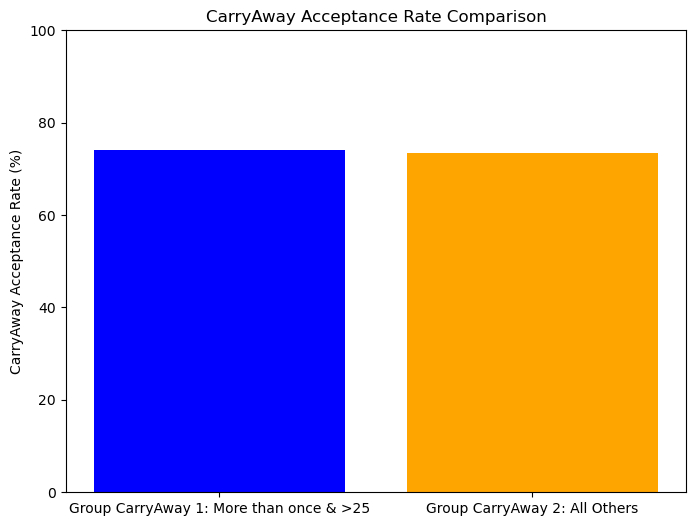

In [383]:
# Group 1: Drivers who CarryAway more than once a month and are over 25
ca_group_1 = df_CarryAway[(df_CarryAway['CarryAway'].isin(['1~3', '4~8', 'gt8'])) & (df_CarryAway['age'] > 25)]

# Group 2: All other drivers
ca_group_2 = df_CarryAway[~((df_CarryAway['CarryAway'].isin(['1~3', '4~8', 'gt8'])) & (df_CarryAway['age'] > 25))]

# Calculate acceptance rates
ca_group_1_acceptance_rate = ca_group_1['Y'].mean() * 100
ca_group_2_acceptance_rate = ca_group_2['Y'].mean() * 100

# Display results
print(f"Acceptance rate for drivers who CarryAway more than once a month and are over 25: {ca_group_1_acceptance_rate:.2f}%")
print(f"Acceptance rate for all other drivers: {ca_group_2_acceptance_rate:.2f}%")


# Prepare data for visualization
ca_categories = ['Group CarryAway 1: More than once & >25', 'Group CarryAway 2: All Others']
ca_acceptance_rates = [ca_group_1_acceptance_rate, ca_group_2_acceptance_rate]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(ca_categories, ca_acceptance_rates, color=['blue', 'orange'])
plt.title('CarryAway Acceptance Rate Comparison')
plt.ylabel('CarryAway Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

Acceptance rate for Group 1 (no kids, non-farming occupations): 74.75%
Acceptance rate for Group 2 (all others): 68.73%


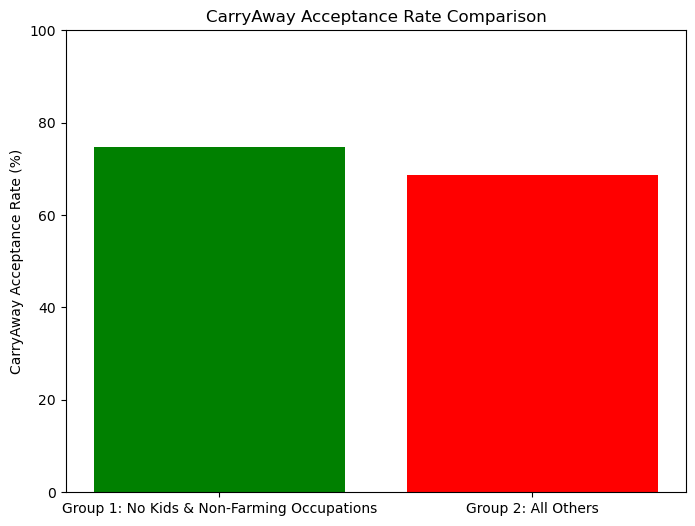

In [389]:
# Group 1: Drivers who go to bars more than once a month, no kid passengers, no farming/fishing/forestry occupations
ca_5_group1 = df_CarryAway[
    (df_CarryAway['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
    (df_CarryAway['passanger'] != 'Kid') &
    (~df_CarryAway['occupation'].isin(['Farming Fishing & Forestry']))
]

# Group 2: All other drivers
ca_5_group2 = df_CarryAway[
    ~((df_CarryAway['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
      (df_CarryAway['passanger'] != 'Kid') &
      (~df_CarryAway['occupation'].isin(['Farming Fishing & Forestry'])))
]

# Calculate acceptance rates
df_CarryAway_5_group1_acceptance_rate = ca_5_group1['Y'].mean() * 100
df_CarryAway_5_group2_acceptance_rate = ca_5_group2['Y'].mean() * 100

# Display results
print(f"Acceptance rate for Group 1 (no kids, non-farming occupations): {df_CarryAway_5_group1_acceptance_rate:.2f}%")
print(f"Acceptance rate for Group 2 (all others): {df_CarryAway_5_group2_acceptance_rate:.2f}%")

# visualization
ca_categories = ['Group 1: No Kids & Non-Farming Occupations', 'Group 2: All Others']
ca_acceptance_rates = [df_CarryAway_5_group1_acceptance_rate, df_CarryAway_5_group2_acceptance_rate]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(ca_categories, ca_acceptance_rates, color=['green', 'red'])
plt.title('CarryAway Acceptance Rate Comparison')
plt.ylabel('CarryAway Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()

6. Compare the acceptance rates between those drivers who:
go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
go to bars more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

CarryAway Acceptance rate for Group 1 (satisfying any of the three conditions): 74.63%
CarryAway Acceptance rate for Group 2 (all others): 69.59%


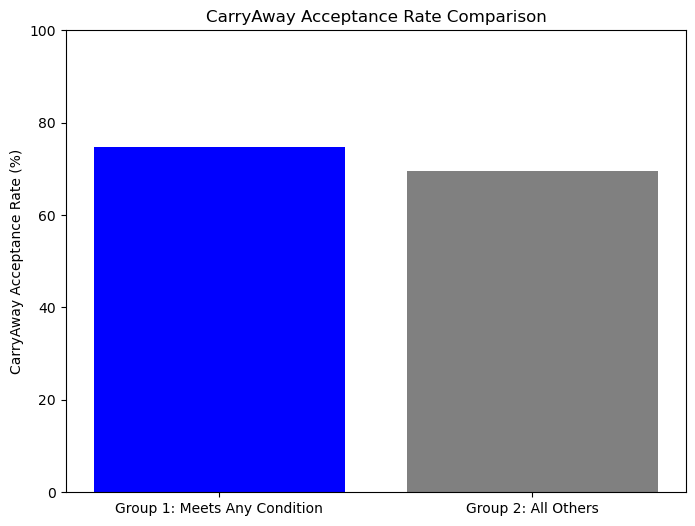

In [397]:
# Filter the data for each condition
df_CarryAway_6_condition1 = (
    (df_CarryAway['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
    (df_CarryAway['passanger'] != 'Kid') &
    (df_CarryAway['maritalStatus'] != 'Widowed')
)

df_CarryAway_6_condition2 = (
    (df_CarryAway['CarryAway'].isin(['1~3', '4~8', 'gt8'])) &
    (df_CarryAway['age'] < 30)
)

df_CarryAway_6_condition3 = (
    (df_CarryAway['RestaurantLessThan20'].isin(['1~3', '4~8', 'gt8'])) &
    (df_CarryAway['income'] < 50000)
)

# Combine the conditions using logical OR
df_CarryAway_6_filtered_data = df_CarryAway[df_CarryAway_6_condition1 | df_CarryAway_6_condition2 | df_CarryAway_6_condition3]

# Group 1: Drivers satisfying any of the three conditions
df_CarryAway_6_group1_acceptance_rate = df_CarryAway_6_filtered_data['Y'].mean() * 100

# Group 2: All other drivers
df_CarryAway_6_group2 = df_CarryAway[~(df_CarryAway_6_condition1 | df_CarryAway_6_condition2 | df_CarryAway_6_condition3)]
df_CarryAway_6_group2_acceptance_rate = df_CarryAway_6_group2['Y'].mean() * 100

# Display results
print(f"CarryAway Acceptance rate for Group 1 (satisfying any of the three conditions): {df_CarryAway_6_group1_acceptance_rate:.2f}%")
print(f"CarryAway Acceptance rate for Group 2 (all others): {df_CarryAway_6_group2_acceptance_rate:.2f}%")

# visualization
df_CarryAway_6_categories = ['Group 1: Meets Any Condition', 'Group 2: All Others']
df_CarryAway_6_acceptance_rates = [df_CarryAway_6_group1_acceptance_rate, df_CarryAway_6_group2_acceptance_rate]

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_CarryAway_6_categories, df_CarryAway_6_acceptance_rates, color=['blue', 'gray'])
plt.title('CarryAway Acceptance Rate Comparison')
plt.ylabel('CarryAway Acceptance Rate (%)')
plt.ylim(0, 100)
plt.show()

7. Based on these observations, what do you hypothesize about drivers who accepted the CarryAway coupons?

Based on a similar analysis for the Carry Away coupons, it is clear that this type of coupon had a pretty high acceptance rate of 73.77%. Overall, factors like kids and age did not impact the carry away coupon acceptance rate. However, it appears that people from urban and sub-urban background are more likely to accept carry out and take away coupons than those who are in farming, fishing and rural background.

8. Recommendations:Given that the driver behaviors and demographics correlate with higher coupon acceptance rates, following is recommended for marketing purposes.

1. Bar coupons be marketed to younger drivers, who are socially active, price conscious
2. Both Bar and CarryAway coupons be targeted for drivers in urban and sub-urban setting.